In [1]:
!nvidia-smi

Mon Jun 22 05:52:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install wordcloud

In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 33kB/s 


In [6]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [7]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [9]:
!gdown --id 1e1SsVct7B6m3GLKlYKHb4ZGy8Ws4K35r --output 515k-hotel-reviews-data-in-europe.zip

Downloading...
From: https://drive.google.com/uc?id=1e1SsVct7B6m3GLKlYKHb4ZGy8Ws4K35r
To: /content/515k-hotel-reviews-data-in-europe.zip
47.3MB [00:00, 221MB/s]


In [10]:
!unzip -q 515k-hotel-reviews-data-in-europe.zip

In [11]:
!ls

515k-hotel-reviews-data-in-europe.zip  Hotel_Reviews.csv  sample_data


In [12]:
df = pd.read_csv("Hotel_Reviews.csv", parse_dates=['Review_Date'])
df.shape

(515738, 17)

In [13]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [14]:
df["review"] = df["Negative_Review"] + df["Positive_Review"]
df["review_type"] = df["Reviewer_Score"].apply(
  lambda x: "bad" if x < 7 else "good"
)

In [15]:
df = df[["review", "review_type"]]

In [16]:
df.iloc[1]["review"]

'No Negative No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam '

In [17]:
df.head() 

,review,review_type
0,I am so angry that i made this post available...,bad
1,No Negative No real complaints the hotel was g...,good
2,Rooms are nice but for elderly a bit difficul...,good
3,My room was dirty and I was afraid to walk ba...,bad
4,You When I booked with your company on line y...,bad


In [18]:
df.review_type.value_counts()

good    428887
bad      86851
Name: review_type, dtype: int64

Text(0.5, 1.0, 'Review type')

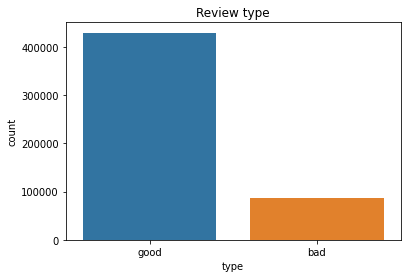

In [18]:
sns.countplot(
  x='review_type',
  data=df,
  order=df.review_type.value_counts().index
)

plt.xlabel("type")
plt.title("Review type")

In [19]:
good_reviews = df[df.review_type == "good"]
bad_reviews = df[df.review_type == "bad"]

In [20]:
print(good_reviews.shape, bad_reviews.shape)

(428887, 2) (86851, 2)


In [21]:
good_reviews_text = " ".join(good_reviews.review.to_numpy().tolist())
bad_reviews_text = " ".join(bad_reviews.review.to_numpy().tolist())

good_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(good_reviews_text)
bad_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(bad_reviews_text)

In [22]:
def show_word_cloud(cloud, title):
  plt.figure(figsize = (16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();

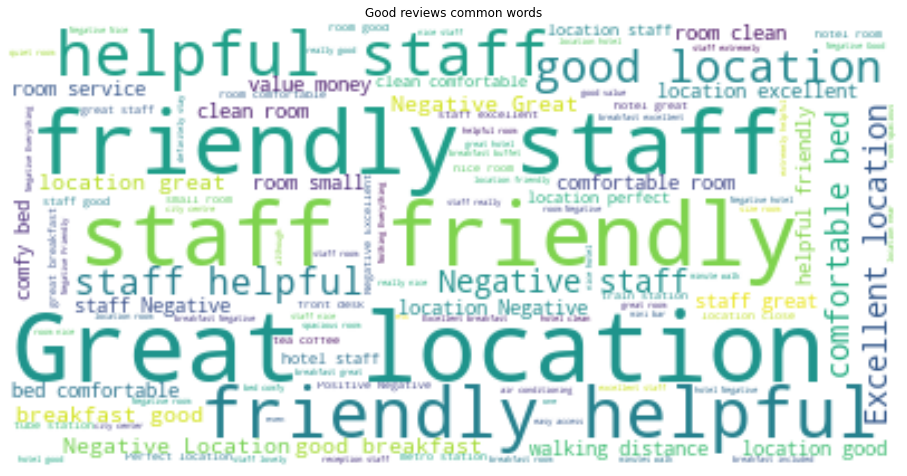

In [23]:
show_word_cloud(good_reviews_cloud, "Good reviews common words")

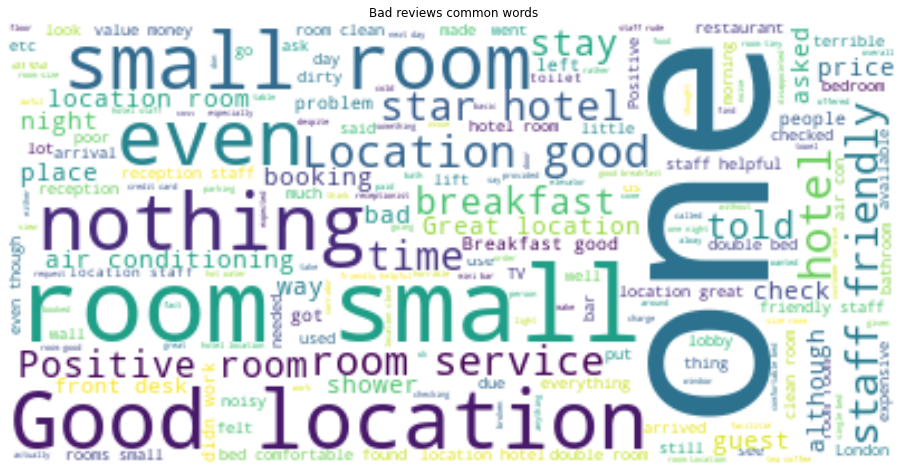

In [24]:
show_word_cloud(bad_reviews_cloud, "Bad reviews common words")

In [25]:
good_df = good_reviews.sample(n=len(bad_reviews), random_state=42)
bad_df = bad_reviews

In [26]:
review_df = good_df.append(bad_df).reset_index(drop=True)
review_df.shape

(173702, 2)

In [27]:
review_df["review_type"].value_counts()

good    86851
bad     86851
Name: review_type, dtype: int64

In [28]:
review_df.head()

,review,review_type
0,Nothing not to like Location was excellent r...,good
1,Replenishment of supplies in room toiletries ...,good
2,No Negative The views,good
3,Could do with biscuits and a complimentary wa...,good
4,Bar prices expensive and mini bar very expens...,good


In [29]:
review_df.to_csv ('motel-review.csv', index = False, header=True)

In [30]:
print(review_df)

                                                   review review_type
0        Nothing not to like  Location was excellent r...        good
1        Replenishment of supplies in room toiletries ...        good
2                                   No Negative The views        good
3        Could do with biscuits and a complimentary wa...        good
4        Bar prices expensive and mini bar very expens...        good
...                                                   ...         ...
173697   Wifi Location No tea or coffee in the room Ra...         bad
173698                                 Everything Nothing         bad
173699   no free parking the room was in another build...         bad
173700   The hotel looks like 3 but surely not 4  Brea...         bad
173701   The ac was useless It was a hot week in vienn...         bad

[173702 rows x 2 columns]


In [49]:
vocab_size = 1000
embedding_dim = 16
max_length = 40
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [36]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [37]:
with open("motel-review.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[1])
        sentence = row[0]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(f'Total number of sentences are {len(sentences)}')
print(f'Total number of labels are {len(labels)}')
print(sentences[0])
print(labels[0])

Total number of sentences are 173702
Total number of labels are 173702
 Nothing not like  Location excellent rooms extremely comfortable well maintained Facilities within hotel great especially lounge perfect place relax day sightseeing 
good


In [38]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print("Training size is {}".format(train_size))
print("Length of sentences in training set is {}".format(len(train_sentences)))
print("Length of labels in training set is {}".format(len(train_labels)))
print("Length of sentences in validation set is {}".format(len(validation_sentences)))
print("Length of labels in validation set is {}".format(len(validation_labels)))

Training size is 138961
Length of sentences in training set is 138961
Length of labels in training set is 138961
Length of sentences in validation set is 34741
Length of labels in validation set is 34741


In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [50]:
#tokenizing
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

In [51]:
#creating word index
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'room': 2, 'the': 3, 'no': 4, 'staff': 5, 'i': 6, 'location': 7, 'hotel': 8, 'not': 9, 'breakfast': 10, 'good': 11, 't': 12, 'negative': 13, 'great': 14, 'bed': 15, 'rooms': 16, 'friendly': 17, 'small': 18, 'nice': 19, 'clean': 20, 'helpful': 21, 'comfortable': 22, 'we': 23, 'very': 24, 'excellent': 25, 'positive': 26, 'bathroom': 27, 'stay': 28, 'one': 29, 'service': 30, 'us': 31, 'really': 32, 'nothing': 33, 'night': 34, 'it': 35, 'like': 36, 'shower': 37, 'reception': 38, 'didn': 39, 'bar': 40, 's': 41, 'also': 42, 'close': 43, 'just': 44, 'get': 45, 'everything': 46, 'lovely': 47, 'station': 48, 'check': 49, 'time': 50, 'well': 51, 'even': 52, 'bit': 53, 'little': 54, 'food': 55, 'view': 56, 'day': 57, 'area': 58, 'price': 59, 'floor': 60, 'poor': 61, '2': 62, 'can': 63, 'walk': 64, 'water': 65, 'perfect': 66, 'facilities': 67, 'london': 68, 'restaurant': 69, 'beds': 70, 'free': 71, 'next': 72, 'coffee': 73, 'there': 74, 'air': 75, 'much': 76, 'wifi': 77, 'quiet': 78, 

In [52]:
#creating sequences for training sentences
train_sequences = tokenizer.texts_to_sequences(train_sentences)

In [53]:
print(train_sequences[0])

[33, 9, 36, 7, 25, 16, 112, 22, 51, 1, 67, 330, 8, 14, 204, 333, 66, 107, 1, 57, 1]


In [54]:
print(train_sentences[0])

 Nothing not like  Location excellent rooms extremely comfortable well maintained Facilities within hotel great especially lounge perfect place relax day sightseeing 


In [55]:
print("Sequence length of first sentence in training set is",len(train_sequences[0]))
print("Sequence length of second sentence in training set is",len(train_sequences[1]))
#there is a difference between length of all these sentence sequences
# so i'll be using post padding and maxlen function to make their length same i.e 120

Sequence length of first sentence in training set is 21
Sequence length of second sentence in training set is 32


In [56]:
# now i'm creating padding sequences
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)
print(train_padded)
print("***********")
print("Length of padded sentence in training set is",len(train_padded[0]))

[[ 33   9  36 ...   0   0   0]
 [  1   1   2 ...   0   0   0]
 [  4  13   3 ...   0   0   0]
 ...
 [  3   7 339 ...   0   0   0]
 [  4   1   1 ...   0   0   0]
 [102 744 409 ...   0   0   0]]
***********
Length of padded sentence in training set is 40


In [57]:
print("length of first sentence was ",len(train_sequences[0]))
print("length of first sentence after padding is ", len(train_padded[0]))

print("length of second sentence was ",len(train_sequences[1]))
print("length of second sentence after padding is ", len(train_padded[1]))

length of first sentence was  21
length of first sentence after padding is  40
length of second sentence was  32
length of second sentence after padding is  40


In [58]:
# now doing the same for validation set
# creating sequence
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
print("Length of first sentence sequence is",len(validation_sequences[0]))
print(validation_sequences[0])

Length of first sentence sequence is 12
[3, 37, 9, 80, 354, 4, 1, 1, 3, 70, 112, 22]


In [61]:
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)
print(f'After padding length of sequence is {len(validation_padded[0])}')

After padding length of sequence is 40


In [62]:
# converting label text(tags) to tokens and then converting it into np.array
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[1]
[1]
[1]
(138961, 1)
[2]
[2]
[2]
(34741, 1)


In [93]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [97]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 40, 16)            16000     
_________________________________________________________________
global_average_pooling1d_10  (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_27 (Dense)             (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [99]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
4343/4343 - 13s - loss: 0.3695 - accuracy: 0.8259 - val_loss: 0.7440 - val_accuracy: 0.6376
Epoch 2/10
4343/4343 - 13s - loss: 0.3673 - accuracy: 0.8274 - val_loss: 0.6385 - val_accuracy: 0.7133
Epoch 3/10
4343/4343 - 13s - loss: 0.3654 - accuracy: 0.8280 - val_loss: 0.6714 - val_accuracy: 0.6672
Epoch 4/10
4343/4343 - 13s - loss: 0.3641 - accuracy: 0.8287 - val_loss: 0.7147 - val_accuracy: 0.6681
Epoch 5/10
4343/4343 - 13s - loss: 0.3630 - accuracy: 0.8286 - val_loss: 0.7334 - val_accuracy: 0.6439
Epoch 6/10
4343/4343 - 13s - loss: 0.3620 - accuracy: 0.8296 - val_loss: 0.6096 - val_accuracy: 0.7262
Epoch 7/10
4343/4343 - 13s - loss: 0.3611 - accuracy: 0.8304 - val_loss: 0.7250 - val_accuracy: 0.6468
Epoch 8/10
4343/4343 - 13s - loss: 0.3603 - accuracy: 0.8315 - val_loss: 0.7012 - val_accuracy: 0.6793
Epoch 9/10
4343/4343 - 14s - loss: 0.3596 - accuracy: 0.8317 - val_loss: 0.6536 - val_accuracy: 0.6953
Epoch 10/10
4343/4343 - 13s - loss: 0.3587 - accuracy: 0.8316 - val_loss:

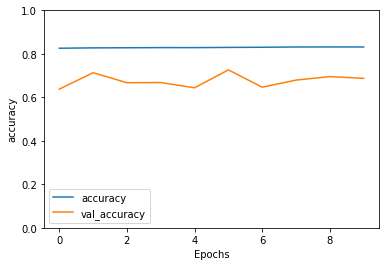

In [100]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylim(0.00,1.00)
  plt.ylabel(string)
  plt.legend([string, 'val_'+string],loc='best')
  plt.show()
  
plot_graphs(history, "accuracy")

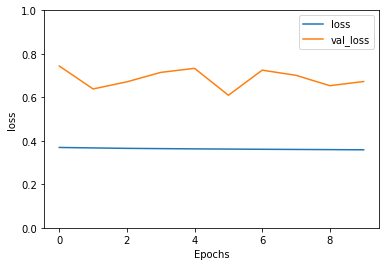

In [101]:
plot_graphs(history, "loss")

In [102]:
label_classes = label_tokenizer.word_index
print(label_classes)

{'good': 1, 'bad': 2}


In [103]:
classlist = []
for key,value in label_classes.items():
  classlist.append(key)
print(classlist)

['good', 'bad']


In [106]:
print("Actual sentences vs labels:")
for j in range(80,85):
  print(f'{validation_labels[j]} : {validation_sentences[j]}')

Actual sentences vs labels:
bad :  basic rooms functional location helpful staff price also good el classico day
bad :  Breakfast not worth money hotel asks eggs ten varieties not 4 stars hotel  Great location modern interior 
bad :  Noisey night Locatio good
bad :  The restaurang location old town city whole
bad :  Very basic four star hotel Only one Engiish channel TV Could not get Sky news  Tea coffee room though little possible


In [107]:
print("My model's predictions")
for j in range(80,85):
  sample_sentence_seq = tokenizer.texts_to_sequences([validation_sentences[j]])
  sample_padded_seq = pad_sequences(sample_sentence_seq)
  predicted_token = np.argmax(model.predict(sample_padded_seq))
  predicted_category = classlist[predicted_token-1]
  print(f'{predicted_category} : {validation_sentences[j]}')

My model's predictions
bad :  basic rooms functional location helpful staff price also good el classico day
bad :  Breakfast not worth money hotel asks eggs ten varieties not 4 stars hotel  Great location modern interior 
bad :  Noisey night Locatio good
bad :  The restaurang location old town city whole
bad :  Very basic four star hotel Only one Engiish channel TV Could not get Sky news  Tea coffee room though little possible


In [118]:
sen = input("Enter a review sentence: ")
input_sentence_seq = tokenizer.texts_to_sequences([sen])
input_padded_seq = pad_sequences(input_sentence_seq)
predicted_token = np.argmax(model.predict(input_padded_seq))
predicted_category = classlist[predicted_token-1]
print(predicted_category)

Enter a review sentence: This hotel is situated in close vicinity of Delhi Airport. The rooms are quite decent sized with good hygiene and ambience. The staff is a bit average in terms of service and politeness. The buffet breakfast was good in terms of variety and choice of cuisine.
good
